## Lead Scoring

Understanding Problem Statement :

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.
There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## STEP 1:Reading and Understanding of data

In [1]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the libraries
import numpy as np
import pandas as pd

import time, warnings
import datetime as dt

from IPython.display import display
pd.options.display.max_columns = None

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library for models
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Reading the data file
DF_LEADS = pd.read_csv('Leads.csv')
DF_LEADS.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking the shape of data frame.
DF_LEADS.shape

(9240, 37)

In [4]:
# Checking the info for all the columns of dataframe.
DF_LEADS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Descibing function provides numerical columns insight like min, max 25%, 50%, 75%, mean, std.
DF_LEADS.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2: Cleaning of data

In [6]:
# Deleting the duplicate values or rows form dataframe.
DF_LEADS.drop_duplicates(inplace= True)

In [7]:
# Checking the shape of data frame
DF_LEADS.shape

(9240, 37)

#### Observation-
There are no duplicates rows are available.

In [8]:
DF_LEADS.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# Inspect the columns
DF_LEADS.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Remember we had encounter a statement there are "select" values in some columns. This colud be customer did not select any values. However,It need to treated as missing values per direction.

In [10]:
# Converting 'select' to np.nan
DF_LEADS = DF_LEADS.replace('Select', np.nan)

In [11]:
# Finding null values per columns as a whole
DF_LEADS.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
# Finding null values percentage per columns 
null_columns = DF_LEADS.isnull().mean().sort_values(ascending = False)
null_columns

How did you hear about X Education               0.784632
Lead Profile                                     0.741883
Lead Quality                                     0.515909
Asymmetrique Profile Score                       0.456494
Asymmetrique Activity Score                      0.456494
Asymmetrique Activity Index                      0.456494
Asymmetrique Profile Index                       0.456494
City                                             0.397078
Specialization                                   0.365801
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
Page Views Per Visit                             0.014827
TotalVisits                                      0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Receive More U

In [13]:
# Columns with more than 40% null values.
null_columns = null_columns[null_columns.values>=0.40]
null_columns.values

array([0.78463203, 0.74188312, 0.51590909, 0.45649351, 0.45649351,
       0.45649351, 0.45649351])

In [14]:
# Making a list of columns for deleting from dataframe
null_columns = list(null_columns.index)

In [15]:
# Dropping the columns with more than 40% null values
df_leads= DF_LEADS.drop(labels=null_columns,axis=1)

In [16]:
# Shape of the dataframe after deleting the columns
df_leads.shape

(9240, 30)

In [17]:
# Remaining columns
df_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [18]:
df_leads.isnull().mean().sort_values(ascending = False)

City                                             0.397078
Specialization                                   0.365801
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
Page Views Per Visit                             0.014827
TotalVisits                                      0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Through Recommendations                          0.000000
Receive More Updates About Our Courses           0.000000
Prospect ID                                      0.000000
Newspaper                                        0.000000
Update me on Supply Chain Content                0.000000
Get updates on DM Content                        0.000000
I agree to pay the amount through cheque         0.000000
A free copy of

In [19]:
# Columns "City" has nearly around 40% missing values
df_leads.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [20]:
# Since "Mumbai" has the highest rank. imputing the missing values with Mumbai.

In [21]:
df_leads['City'] = df_leads['City'].replace(np.nan, 'Mumbai')
df_leads.City.value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [22]:
# Since "Specialization" is next most missing values around 37%.
df_leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

#### Missing values could be due to the person not able to fill desired spcialization if he is job less or a student. Here, we find there is no "Other " option, filling those missng values by "Other" under specialization.

In [23]:
df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan, 'Other')
df_leads['Specialization'].value_counts()

Other                                3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [24]:
# Columns "TAG" has 37% missiing values.
df_leads.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [25]:
# Imputing the missng values with most filled value.
df_leads['Tags'] = df_leads['Tags'].replace(np.nan, 'Will revert after reading the email')
df_leads['Tags'].value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [26]:
df_leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [27]:
# From the above details, it is understood that this is a highly skewed column. Dropping this column.

In [28]:
df_leads = df_leads.drop('What matters most to you in choosing a course', axis=1)

In [29]:
# Next most missing values with column "What is your current occupation". it has 29% missing values.

In [30]:
df_leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [31]:
# Imputing the missing values with "unemployed value".

In [32]:
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(np.nan, 'Unemployed')
df_leads['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [33]:
# Next most missing values in Country Column around 27% of missing values .

In [34]:
df_leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [35]:
# Since the country column values are highly skewed,dropping this column

In [36]:
df_leads = df_leads.drop('Country', axis=1)

In [37]:
(df_leads.isnull().mean()*100).sort_values(ascending = False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
City                                        0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Tags                                        0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
Lead Number                                 0.

In [38]:
# Remaining columns have less then 2% of missing values, dropping misssing rows rather than columns.

In [39]:
df_leads.dropna(inplace= True)

In [40]:
(df_leads.isnull().mean()*100).sort_values(ascending = False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

#### All the columns have  zero misssing values. we have already deleted duplicate row values.

In [41]:
# Not considering the less important columns in the analysis.

In [42]:
Unnecessary_cols = ["Prospect ID","Lead Number","A free copy of Mastering The Interview","Search", "Magazine", "Newspaper Article",
                    "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations",
                    "Receive More Updates About Our Courses","Update me on Supply Chain Content","Tags",
                    "Get updates on DM Content","I agree to pay the amount through cheque"]

In [43]:
# Dropping these columns
df_leads= df_leads.drop(labels= Unnecessary_cols, axis=1)
df_leads.shape

(9074, 13)

In [44]:
# Before visualization checking the data imbalance.Since "Converted" is our target variable. 
# We will check the data imbalance through converted column.

In [45]:
df_leads.Converted.value_counts(normalize = True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

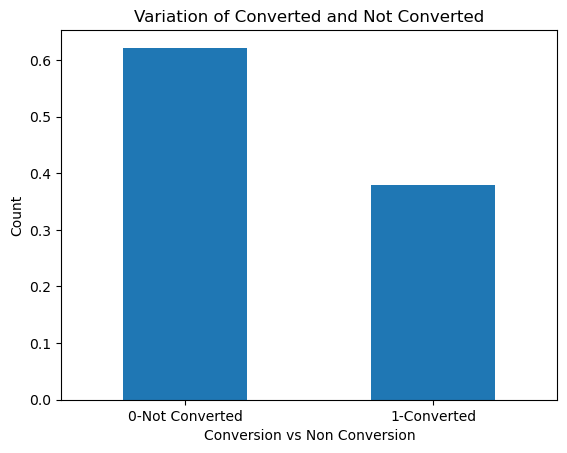

In [46]:
df_leads.Converted.value_counts(normalize= True).plot.bar()
plt.title('Variation of Converted and Not Converted')
plt.xlabel('Conversion vs Non Conversion', fontsize= 10)
#listOf_Xticks =['No Payment Difficulty','Difficulty']
plt.xticks(ticks=[0,1], labels=['0-Not Converted', '1-Converted'], rotation = 0)
plt.ylabel('Count', fontsize= 10)
plt.show()

## Step 3: Visualization of data and study of data

In [47]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Do Not Call                      9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  City                             9074 non-null   object 
 12  Last Notable Activit

### Univariate Analysis and Bivariate Analysis

In [48]:
cat_columns = df_leads.columns[df_leads.dtypes == 'object'].tolist()
cat_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'City',
 'Last Notable Activity']

In [49]:
def cat_col(column):
    sns.set_style('whitegrid')
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    sns.countplot(x=column, data=df_leads)
    plt.xticks(rotation = 90)
    plt.subplot(1,2,2)
    sns.countplot(x=column, data=df_leads, hue='Converted')
    plt.xticks(rotation = 90)
    plt.show()

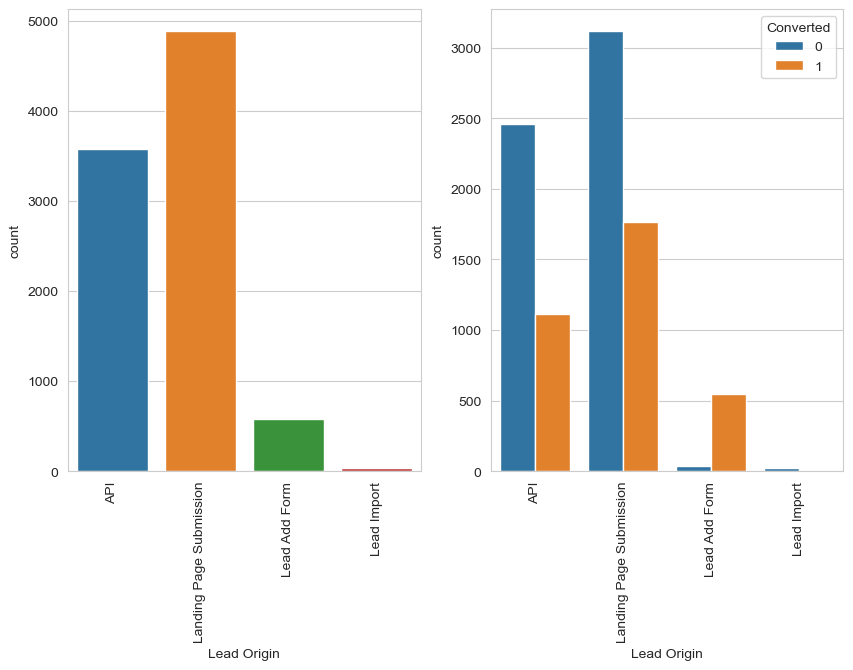

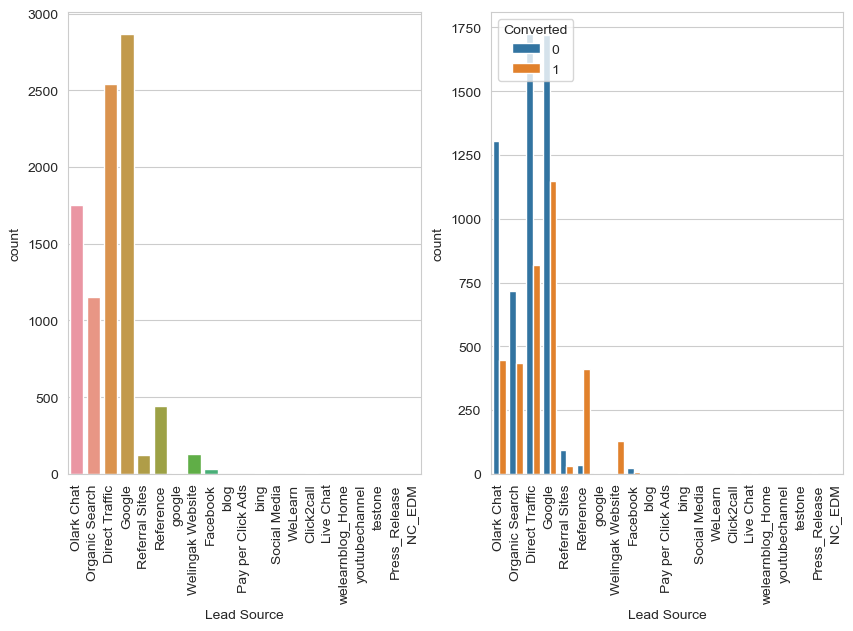

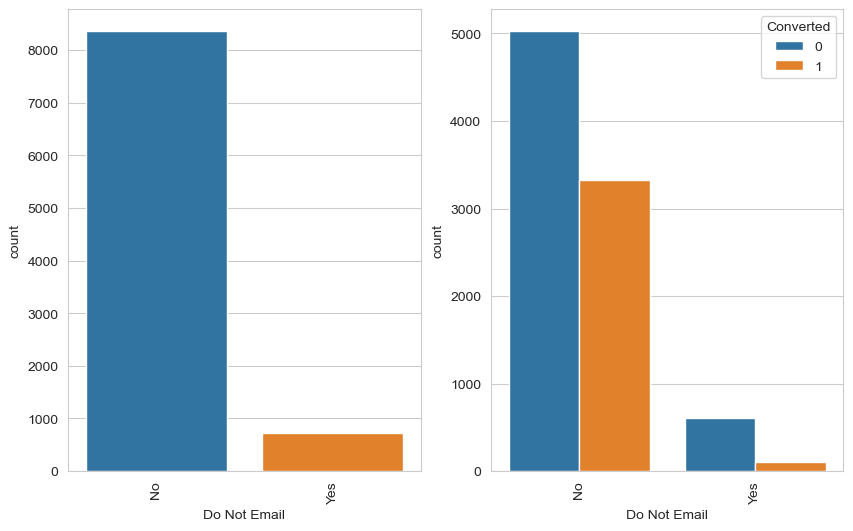

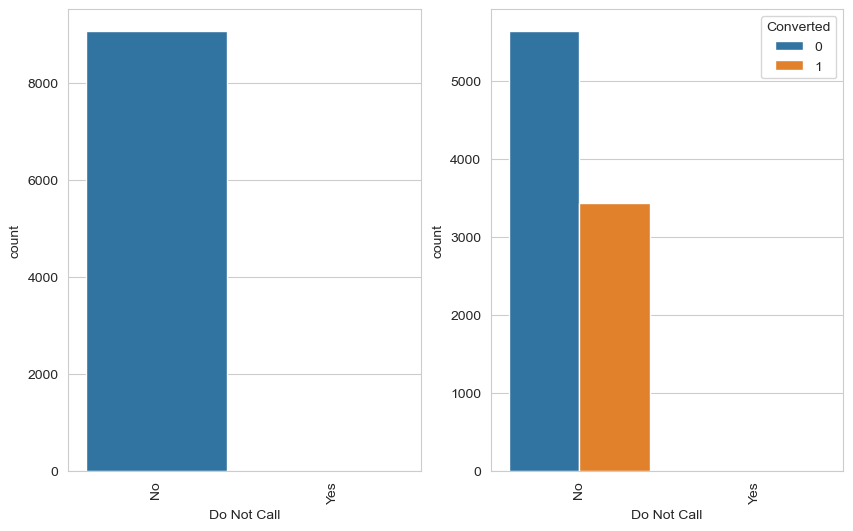

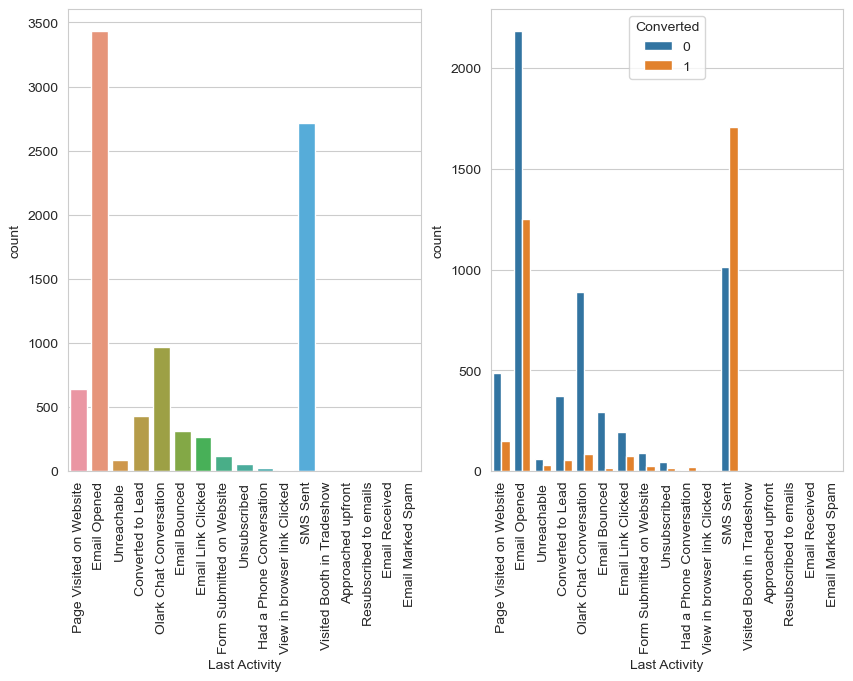

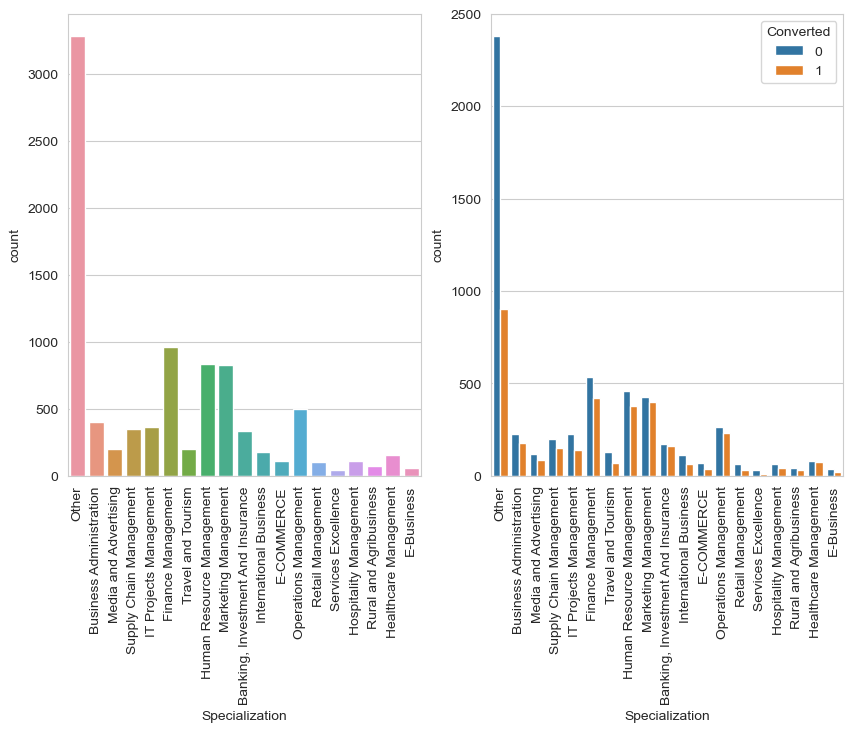

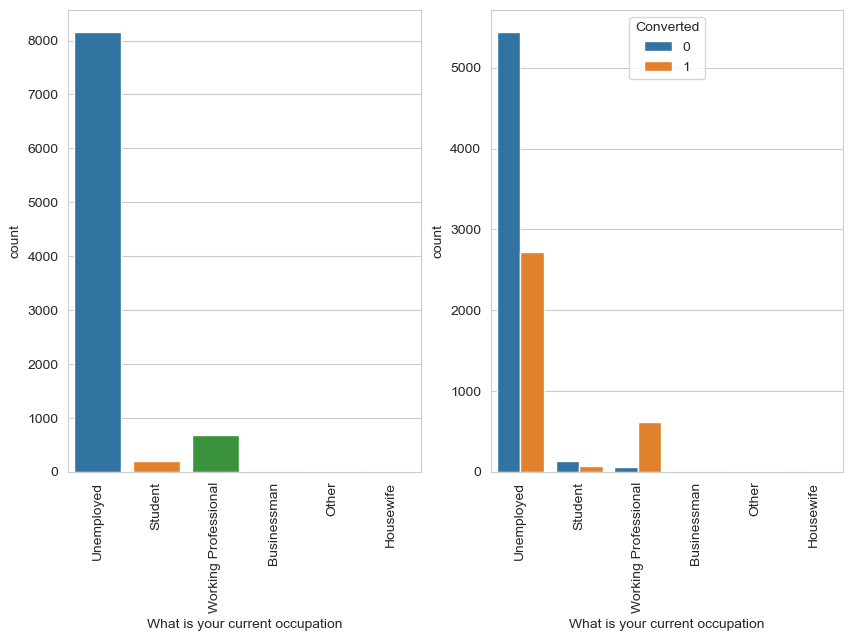

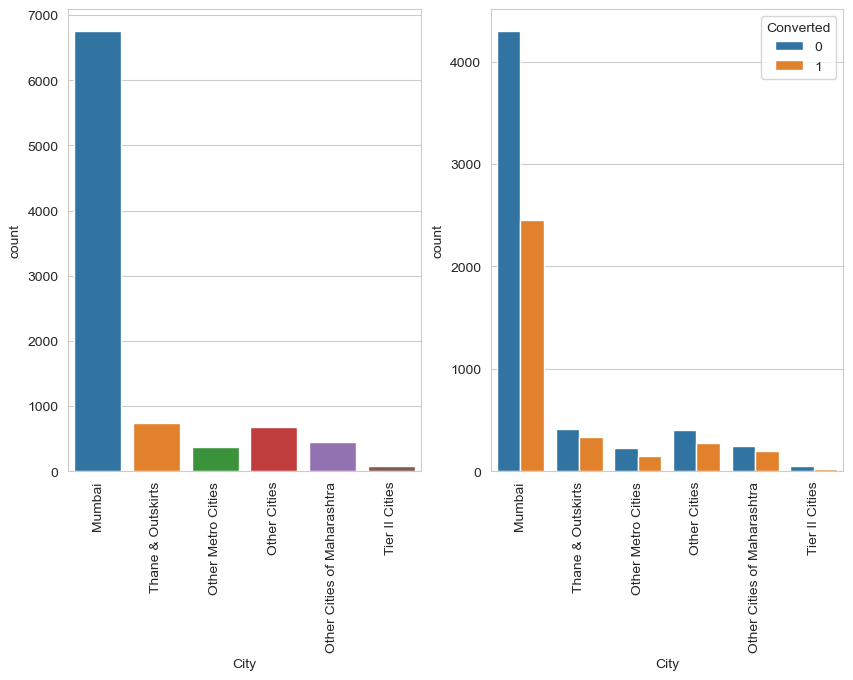

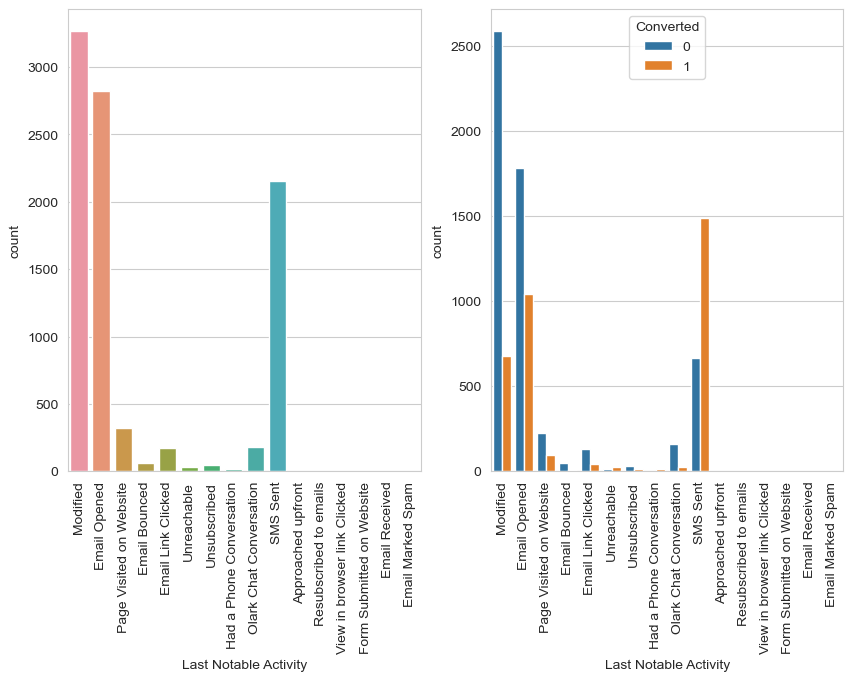

In [50]:
for i in cat_columns:
    cat_col(i)

Observation-

1. "Lead Origin" is a category or source from which leads are generated, and "landing page submission" is one of the methods used to capture leads. It's good to hear that "landing page submission" is effective, and it's even better that customer conversions are proportional to these submissions. This suggests that the leads acquired through landing page submissions are more likely to convert into customers.

2. Google is the most popular search engine globally, and many people use it to find information, products, and services. By optimizing your online presence for Google search (Search Engine Optimization or SEO), you can attract organic traffic and leads.

3. Most customer prefers do not disturb as their option. It is understood that, they do not want to be influenced from the company, whether they are converted or not converted.

4. ‘Email opened’ and ‘SMS sent’ seems higher in last activity segment.

5. Since most of the person don't prefer to fill specialization. However, focusing on finance management, human resource management, marketing management would give higher conversion ratio.

6. Unemployed customer have higher number as compare to working professional or student. However, working professional is having higher conversion ratio.

7. Customer belongs to Mumbai is the highest conversion ratio compare to other cities in Maharashtra state and also in tier-II cities.

8. "SMS Sent" last noted activity has highest conversion ratio compared to others.

In [51]:
# Numerical column analysis.

In [52]:
cont_columns = df_leads.columns[df_leads.dtypes == 'float'].tolist()
cont_columns

['TotalVisits', 'Page Views Per Visit']

-------------------


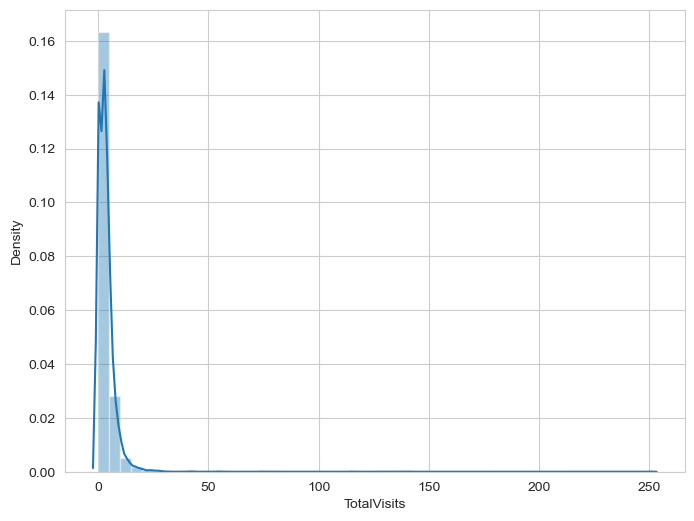

-------------------


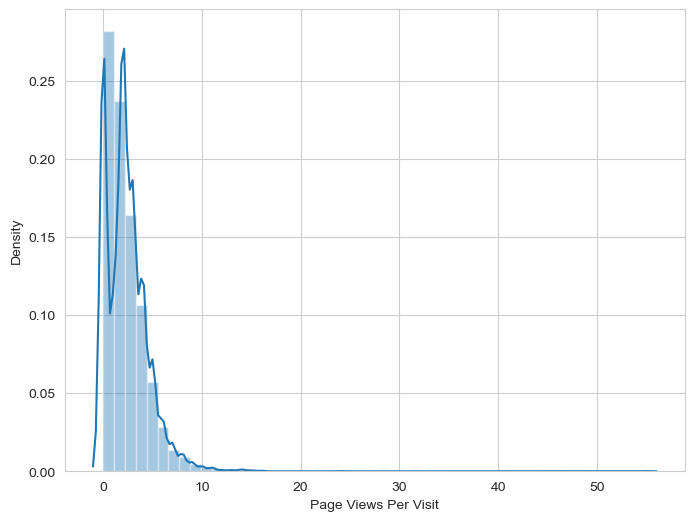

In [53]:
for i in cont_columns:
    plt.figure(figsize = (8,6))
    sns.distplot(x= df_leads[i])
    plt.xlabel(i)
    print("-------------------")
    plt.show()

In [54]:
df_leads['Total Time Spent on Website'].value_counts()

0       2165
60        19
127       18
75        18
74        17
        ... 
609        1
1035       1
802        1
840        1
927        1
Name: Total Time Spent on Website, Length: 1717, dtype: int64

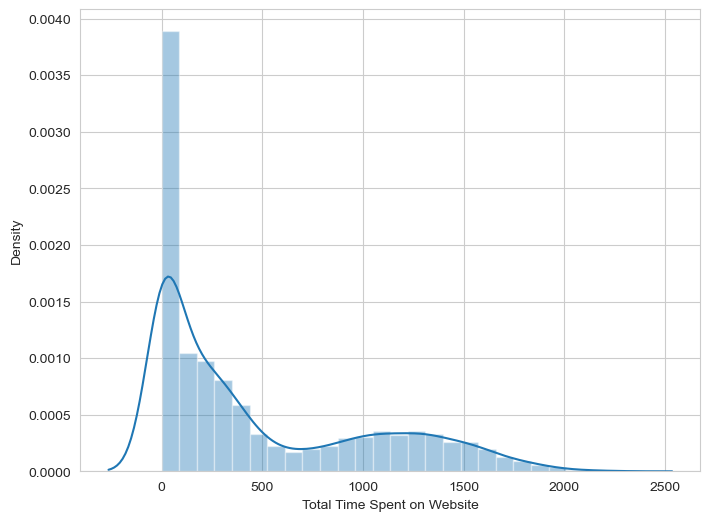

In [55]:
plt.figure(figsize = (8,6))
sns.distplot(x= df_leads['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')
plt.show()

In [56]:
# finding the outlier in numerical variables.

In [57]:
numerical = ['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']

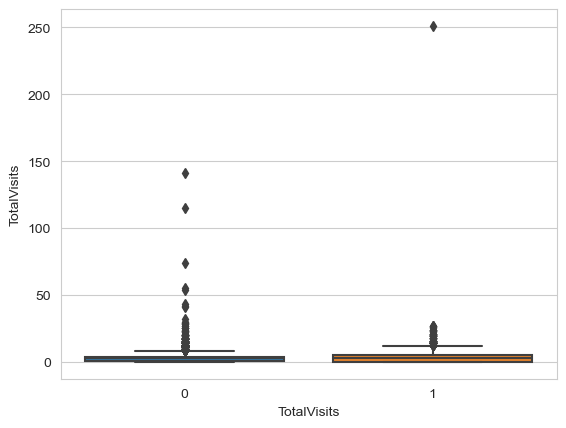

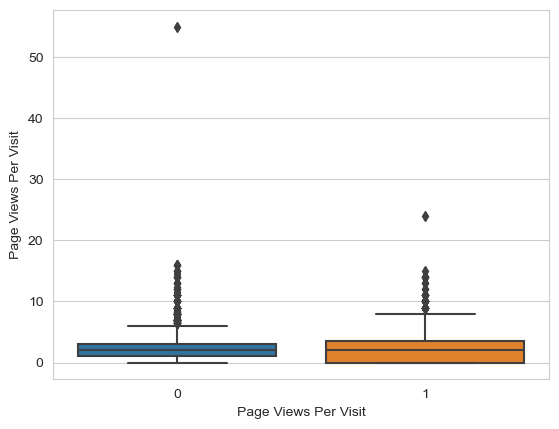

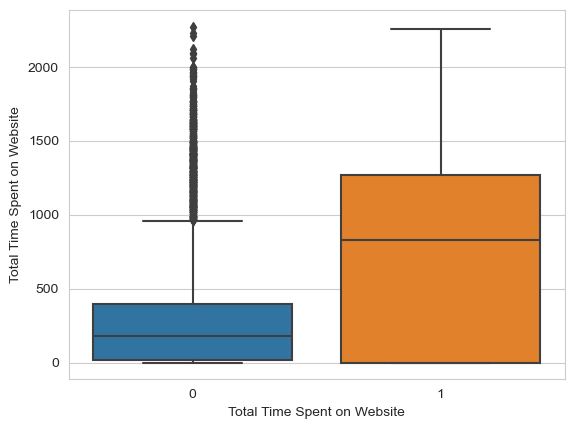

In [58]:
for i in numerical:
    sns.boxplot(y=i, x='Converted', data= df_leads)
    plt.xlabel(i)
    plt.show()

#### Observation

1. The observation that the median value for "Total time spent" by customers who converted is almost similar to the maximum value for those who did not convert suggests an interesting trend in your data. It implies that there is a substantial overlap in the time spent on the website between those who converted and those who didn't. 

2. The presence of outliers in the "TotalVisit" and "Page views per visit" columns can significantly impact our data analysis and interpretation. Outliers are data points that deviate significantly from the majority of the data and can distort statistical measures and patterns. It's essential to address these outliers to ensure the accuracy and reliability of your analysis.

In [59]:
# Removing statistical outlier. Kepping values between 5%-95%
percentiles = df_leads['TotalVisits'].quantile([0.05,0.95]).values
percentiles

array([ 0., 10.])

In [60]:
# Removing statistical outlier. Kepping values between 5%-95%
percentiles = df_leads['Page Views Per Visit'].quantile([0.05,0.95]).values
percentiles

array([0., 6.])

In [61]:
# for "TotalVisits" column

Q1 = df_leads['TotalVisits'].quantile(0.05)
Q3 = df_leads['TotalVisits'].quantile(0.95)
IQR = Q3-Q1
df_leads = df_leads[(df_leads['TotalVisits'] >= Q1 - 1.5*IQR) & (df_leads['TotalVisits'] <= Q3 + 1.5*IQR)]

# for "Page Views Per Visit" column

Q1 = df_leads['Page Views Per Visit'].quantile(0.05)
Q3 = df_leads['Page Views Per Visit'].quantile(0.95)
IQR = Q3-Q1
df_leads = df_leads[(df_leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (df_leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

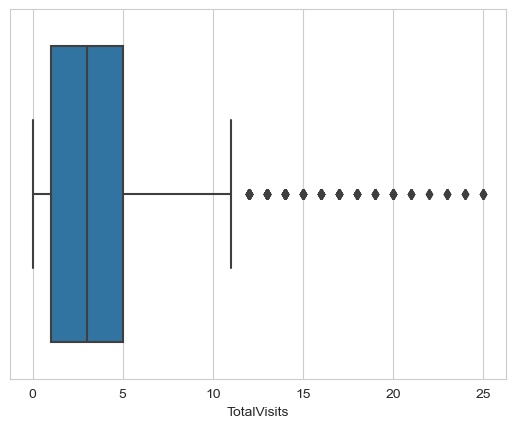

In [62]:
sns.boxplot(x='TotalVisits', data= df_leads)
plt.xlabel('TotalVisits')
plt.show()

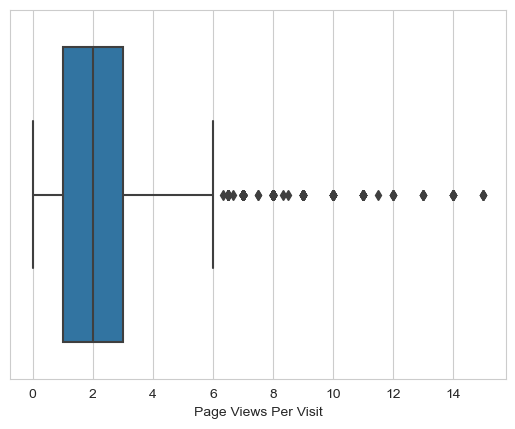

In [63]:
sns.boxplot(x='Page Views Per Visit', data= df_leads)
plt.xlabel('Page Views Per Visit')
plt.show()

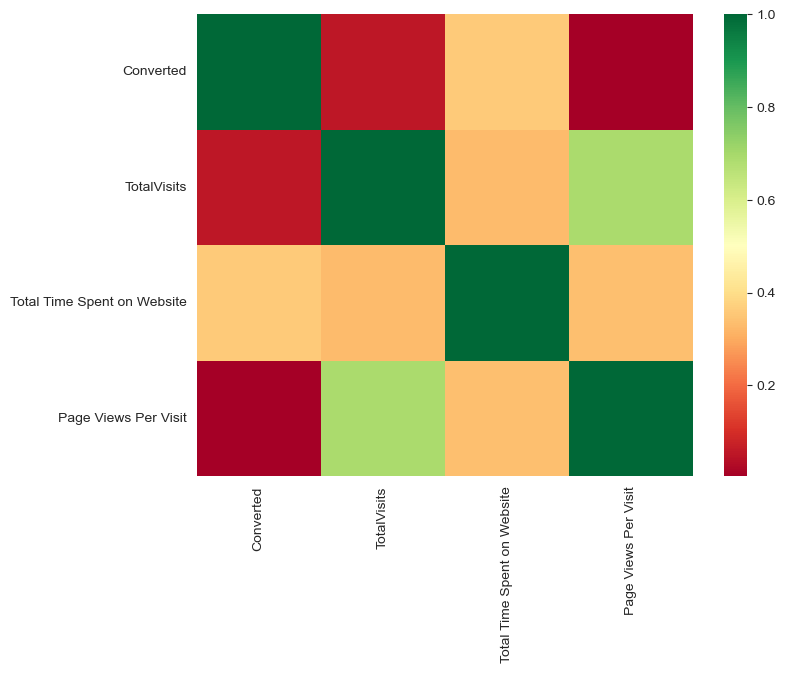

In [67]:
# Let's see the correlation matrix 
plt.figure(figsize = (8,6))  # Size of the figure
sns.heatmap(df_leads.corr(),cmap = "RdYlGn")
plt.show()

#### Observation-

It seems 'Page views Per Visit' and 'TotalVisits' are correlated with each other.

## Step 4: Data preparation

In [64]:
# Converting yes/no to 1/0 binary values.
vars = ['Do Not Email', 'Do Not Call']

# defining map function
def binary_map(x):
    return x.map({'Yes':1, 'No':0})
df_leads[vars] = df_leads[vars].apply(binary_map)

In [65]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9048 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9048 non-null   object 
 1   Lead Source                      9048 non-null   object 
 2   Do Not Email                     9048 non-null   int64  
 3   Do Not Call                      9048 non-null   int64  
 4   Converted                        9048 non-null   int64  
 5   TotalVisits                      9048 non-null   float64
 6   Total Time Spent on Website      9048 non-null   int64  
 7   Page Views Per Visit             9048 non-null   float64
 8   Last Activity                    9048 non-null   object 
 9   Specialization                   9048 non-null   object 
 10  What is your current occupation  9048 non-null   object 
 11  City                             9048 non-null   object 
 12  Last Notable Activit

In [66]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Mumbai,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other,Unemployed,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Mumbai,Modified


In [67]:
# Creating dummy variables
dummy_var =['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
            'City','Last Notable Activity']

In [68]:
df_dummy = pd.get_dummies(df_leads[dummy_var], drop_first=True)
df_dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [69]:
# Comparing both datafrmae shape
print(df_leads.shape, df_dummy.shape) 

(9048, 13) (9048, 82)


In [70]:
# Merging two data frame.
df_leads= pd.concat([df_leads, df_dummy], axis=1)
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Mumbai,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other,Unemployed,Mumbai,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted 

In [71]:
# Dropping the redundant column for which dummy variables has been created.
df_leads = df_leads.drop(dummy_var, axis=1)
df_leads.shape

(9048, 88)

In [72]:
df_leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Step 5: Splitting the data to train-test sets

In [73]:
y = df_leads['Converted']
X = df_leads.drop('Converted', axis=1)

In [74]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [75]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [76]:
# Train_Test split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6333, 87)
(2715, 87)
(6333,)
(2715,)


## Step 6: Scaling the features

In [78]:
# Applying the scaler values for numerical continous columns
scaler = StandardScaler()
num1= ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']
X_train[num1]= scaler.fit_transform(X_train[num1])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8425,0,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8341,0,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7376,0,0,-0.402157,-0.071940,-0.165214,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7414,0,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3521,0,0,0.517288,1.213416,1.305648,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


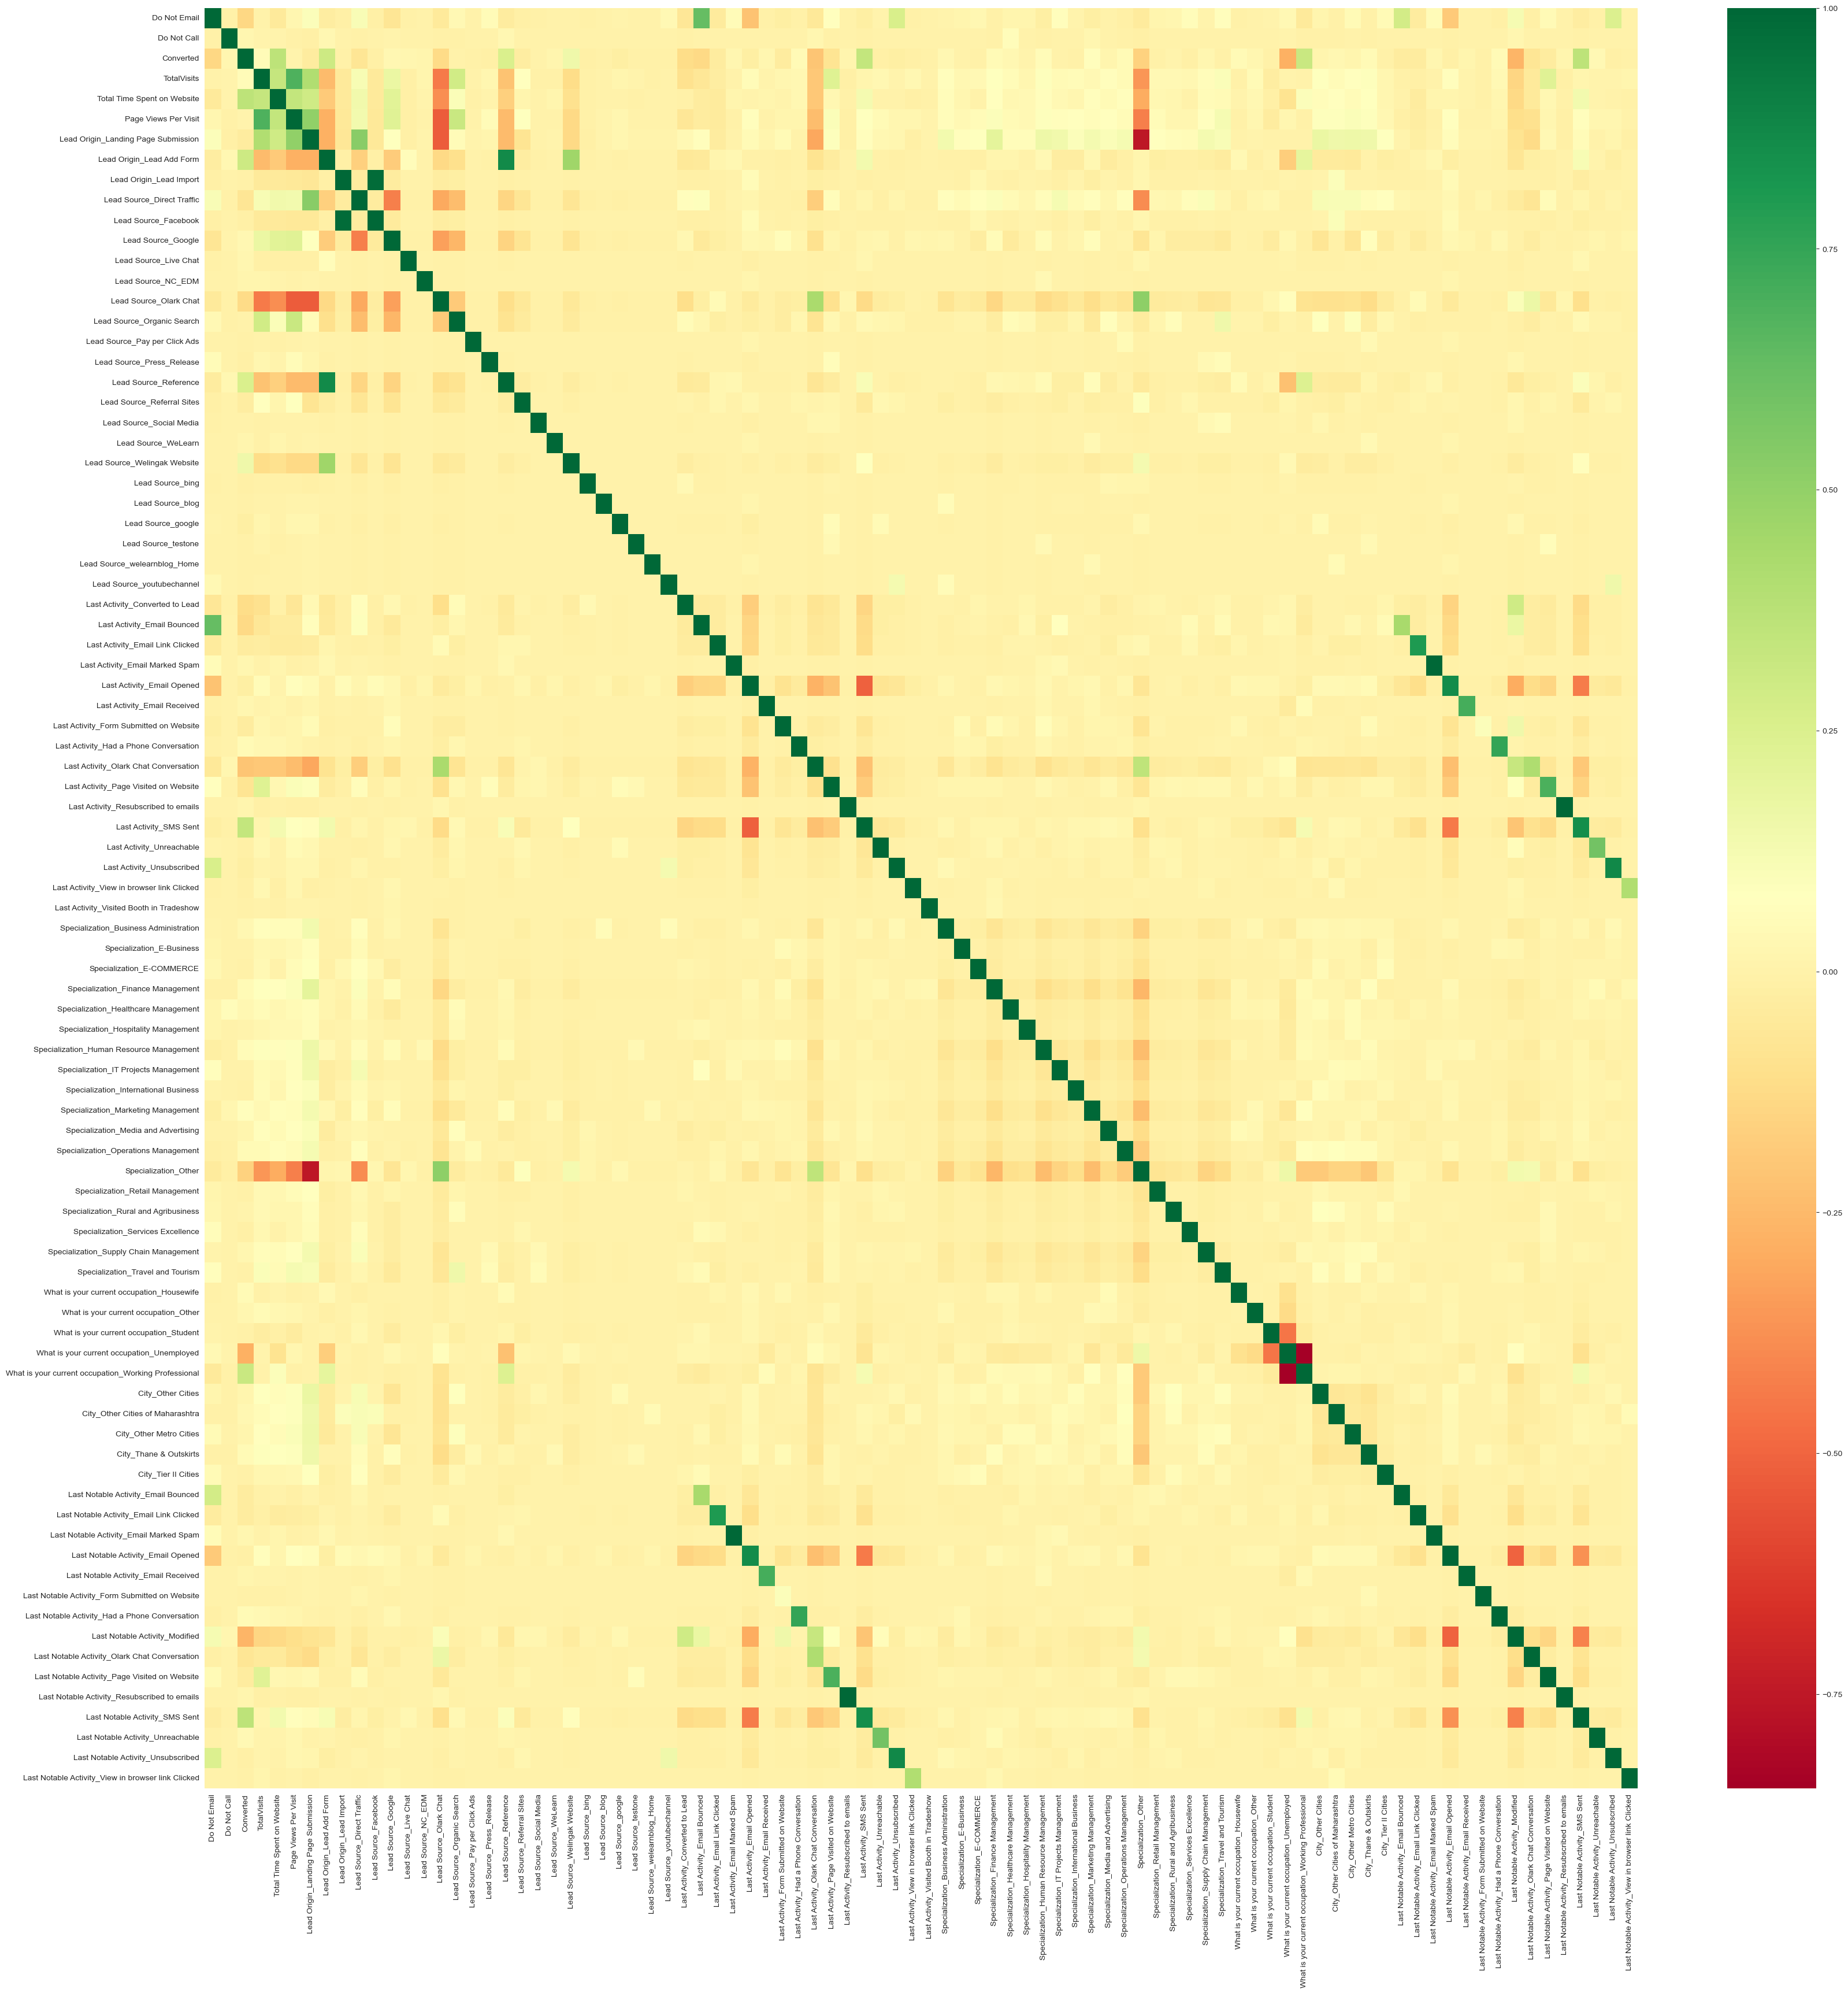

In [79]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,40))  # Size of the figure
sns.heatmap(df_leads.corr(),cmap = "RdYlGn")
plt.show()

#### Identifing correlation between variables is difficult from heatmap, selection of variables is to be done thrugh rfe selection. 

## Step 7: Model Building

In [81]:
# Feature selection using RFE with variables

In [82]:
logreg = LogisticRegression()

In [83]:
# running RFE with roughly 20 variables (nearly 1/4)as output
rfe = RFE(logreg, n_features_to_select = 20)
rfe= rfe.fit(X_train, y_train)

In [84]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False,  True, False, False, False,  True,  True,
        True, False, False,  True, False, False])

In [85]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 16),
 ('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 33),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Facebook', False, 65),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Live Chat', False, 46),
 ('Lead Source_NC_EDM', False, 21),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', False, 67),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 15),
 ('Lead Source_Social Media', False, 17),
 ('Lead Source_WeLearn', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 12),
 ('Lead Source_blog', False, 22),
 ('Lead Source_google', False, 48),
 ('Lead Source_testone', Fal

In [86]:
# Viewing the columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

####  Model :- 1

In [87]:
X_train_sm1 = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train, X_train_sm1, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.4
Date:                Thu, 12 Oct 2023   Deviance:                       5174.9
Time:                        23:45:08   Pearson chi2:                 6.29e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3989
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0019      0.203      0.010      0.992      -0.396       0.400
Do Not Email                                            -1.2466      0.182     -6.844      0.000      -1.604      -0.890
Total Time Spent on Website                              1.0962      0.041     26.920      0.000       1.016       1.176
Lead Origin_Landing Page Submission                     -1.0793      0.131     -8.208      0.000      -1.337      -0.822
Lead Origin_Lead Add Form                                3.3530      0.242     13.883      0.000       2.880       3.826
Lead Origin_Lead Import                                  1.1498      0.497      2.313      0.021       0.176       2.124
Lead Source_Olark Chat                                   1.0510      0.123      8.549      0.000       0.810       1.292
Lead Source_Welingak Website                             3.0826      1.037      2.972      0.003       1.050       5.115
Last Activity_Email Opened                               1.0126      0.160      6.341      0.000       0.700       1.326
Last Activity_Had a Phone Conversation                   2.7559      0.817      3.375      0.001       1.156       4.356
Last Activity_SMS Sent                                   1.2307      0.153      8.042      0.000       0.931       1.531
Specialization_Hospitality Management                   -0.8227      0.329     -2.498      0.012      -1.468      -0.177
Specialization_Other                                    -1.1296      0.126     -8.941      0.000      -1.377      -0.882
What is your current occupation_Housewife               23.1781   1.42e+04      0.002      0.999   -2.79e+04    2.79e+04
What is your current occupation_Working Professional     2.6128      0.192     13.608      0.000       2.236       2.989
Last Notable Activity_Email Link Clicked                -0.8932      0.314     -2.846      0.004      -1.508      -0.278
Last Notable Activity_Email Opened                      -1.2012      0.198     -6.076      0.000      -1.589      -0.814
Last Notable Activity_Modified                          -1.4394      0.140    -10.267      0.000      -1.714      -1.165
Last Notable Activity_Olark Chat Conversation           -1.7507      0.367     -4.767      0.000      -2.471      -1.031
Last Notable Activity_Page Visited on Website           -0.8078      0.264     -3.066      0.002      -1.324      -0.291
Last Notable Activity_Unreachable                        1.4659      0.547      2.679      0.007       0.393       2.538
========================================================================================================================
"""

In [88]:
## Predicted the values
y_train_pred = res1.predict(X_train_sm1)

In [89]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22648063, 0.22648063, 0.20673302, 0.18747609, 0.98363905,
       0.07733662, 0.20838322, 0.07733662, 0.54758857, 0.39408352])

In [90]:
##### Creating a dataframe with the actual converted values and the predicted probabilities
#### Predict the values
y_train_pred_final = pd.DataFrame({"Converted":y_train.values, "Conversion_Prob":y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.226481,8425
1,0,0.226481,8341
2,0,0.206733,7376
3,0,0.187476,7414
4,1,0.983639,3521


#### Choosing an arbitary cut-off probability point of 0.5 to find the predicted labels

In [91]:
##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final["Predicted"] = y_train_pred_final.Conversion_Prob.apply(lambda x: 1 if x > 0.5 else 0)

# Print the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
0,0,0.226481,8425,0
1,0,0.226481,8341,0
2,0,0.206733,7376,0
3,0,0.187476,7414,0
4,1,0.983639,3521,1


In [92]:
from sklearn import metrics

In [93]:
# Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3498  441]
 [ 728 1666]]


In [94]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3498      441
# converted            728       1666  

In [95]:
# let's check overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8154113374388126


#### Accuracy for the first model is good to start with. However, some columns have higher P-values we need to revise the columns for model building.

In [96]:
# Since the P-value of "What is your current occupation_Housewife" is very high, droppping this variables.

In [97]:
cols = cols.drop("What is your current occupation_Housewife" )
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

####  Model :- 2

In [98]:
X_train_sm2 = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train, X_train_sm2, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.8
Date:                Thu, 12 Oct 2023   Deviance:                       5189.6
Time:                        23:45:15   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3975
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0091      0.203      0.045      0.964      -0.388       0.407
Do Not Email                                            -1.2510      0.182     -6.872      0.000      -1.608      -0.894
Total Time Spent on Website                              1.0948      0.041     26.926      0.000       1.015       1.175
Lead Origin_Landing Page Submission                     -1.0734      0.131     -8.171      0.000      -1.331      -0.816
Lead Origin_Lead Add Form                                3.3687      0.241     13.963      0.000       2.896       3.842
Lead Origin_Lead Import                                  1.1460      0.497      2.306      0.021       0.172       2.120
Lead Source_Olark Chat                                   1.0490      0.123      8.539      0.000       0.808       1.290
Lead Source_Welingak Website                             3.0669      1.037      2.958      0.003       1.034       5.099
Last Activity_Email Opened                               1.0166      0.159      6.389      0.000       0.705       1.328
Last Activity_Had a Phone Conversation                   2.7446      0.817      3.361      0.001       1.144       4.345
Last Activity_SMS Sent                                   1.2212      0.153      7.989      0.000       0.922       1.521
Specialization_Hospitality Management                   -0.8297      0.329     -2.520      0.012      -1.475      -0.184
Specialization_Other                                    -1.1330      0.126     -8.974      0.000      -1.380      -0.886
What is your current occupation_Working Professional     2.6049      0.192     13.573      0.000       2.229       2.981
Last Notable Activity_Email Link Clicked                -0.8890      0.312     -2.848      0.004      -1.501      -0.277
Last Notable Activity_Email Opened                      -1.2080      0.197     -6.122      0.000      -1.595      -0.821
Last Notable Activity_Modified                          -1.4384      0.140    -10.263      0.000      -1.713      -1.164
Last Notable Activity_Olark Chat Conversation           -1.7547      0.367     -4.779      0.000      -2.474      -1.035
Last Notable Activity_Page Visited on Website           -0.8167      0.263     -3.101      0.002      -1.333      -0.301
Last Notable Activity_Unreachable                        1.4555      0.547      2.660      0.008       0.383       2.528
========================================================================================================================
"""

#### Observation
P-values are within the permissible limit. checking the VIF values.

In [100]:
##### Checking VIFs
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif["Featutes"] = X_train[cols].columns
vif["VIF"] = [variance_inflation_factor(X_train[cols].values,i) for i in range(X_train[cols].shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by =  ["VIF"],ascending = False)
vif

,Featutes,VIF
14,Last Notable Activity_Email Opened,8.45
7,Last Activity_Email Opened,7.39
2,Lead Origin_Landing Page Submission,5.12
11,Specialization_Other,3.44
15,Last Notable Activity_Modified,3.13
9,Last Activity_SMS Sent,2.75
5,Lead Source_Olark Chat,2.12
3,Lead Origin_Lead Add Form,1.86
6,Lead Source_Welingak Website,1.35
1,Total Time Spent on Website,1.32


#### Observation
Since the VIF of "Last Notable Activity_Email Opened" is very high, droppping this variables.

In [102]:
cols = cols.drop("Last Notable Activity_Email Opened" )
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

####  Model :- 3

In [103]:
X_train_sm3 = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train, X_train_sm3, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.4
Date:                Thu, 12 Oct 2023   Deviance:                       5226.8
Time:                        23:46:00   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3940
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5488      0.180     -3.050      0.002      -0.901      -0.196
Do Not Email                                            -1.1387      0.179     -6.363      0.000      -1.489      -0.788
Total Time Spent on Website                              1.0957      0.041     27.037      0.000       1.016       1.175
Lead Origin_Landing Page Submission                     -1.0727      0.131     -8.176      0.000      -1.330      -0.816
Lead Origin_Lead Add Form                                3.4032      0.242     14.081      0.000       2.930       3.877
Lead Origin_Lead Import                                  1.0991      0.499      2.205      0.027       0.122       2.076
Lead Source_Olark Chat                                   1.0577      0.123      8.632      0.000       0.818       1.298
Lead Source_Welingak Website                             3.0259      1.038      2.916      0.004       0.992       5.060
Last Activity_Email Opened                               0.4581      0.136      3.363      0.001       0.191       0.725
Last Activity_Had a Phone Conversation                   3.0485      0.778      3.918      0.000       1.523       4.574
Last Activity_SMS Sent                                   1.6511      0.134     12.328      0.000       1.389       1.914
Specialization_Hospitality Management                   -0.8268      0.325     -2.544      0.011      -1.464      -0.190
Specialization_Other                                    -1.1257      0.126     -8.927      0.000      -1.373      -0.879
What is your current occupation_Working Professional     2.6216      0.192     13.630      0.000       2.245       2.999
Last Notable Activity_Email Link Clicked                -0.3408      0.298     -1.142      0.253      -0.926       0.244
Last Notable Activity_Modified                          -0.8625      0.101     -8.561      0.000      -1.060      -0.665
Last Notable Activity_Olark Chat Conversation           -1.2106      0.355     -3.408      0.001      -1.907      -0.514
Last Notable Activity_Page Visited on Website           -0.2714      0.247     -1.099      0.272      -0.755       0.213
Last Notable Activity_Unreachable                        2.0064      0.539      3.724      0.000       0.951       3.062
========================================================================================================================
"""

####  Observation
P-values of "Last Notable Activity_Page Visited on Website" is very  high. dropping this column

In [105]:
cols = cols.drop("Last Notable Activity_Page Visited on Website")
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

####  Model :- 4

In [106]:
X_train_sm4 = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train, X_train_sm4, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.0
Date:                Thu, 12 Oct 2023   Deviance:                       5228.0
Time:                        23:46:02   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3939
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6294      0.164     -3.828      0.000      -0.952      -0.307
Do Not Email                                            -1.1262      0.179     -6.306      0.000      -1.476      -0.776
Total Time Spent on Website                              1.0943      0.040     27.031      0.000       1.015       1.174
Lead Origin_Landing Page Submission                     -1.0764      0.131     -8.204      0.000      -1.334      -0.819
Lead Origin_Lead Add Form                                3.3981      0.242     14.068      0.000       2.925       3.872
Lead Origin_Lead Import                                  1.0906      0.498      2.189      0.029       0.114       2.067
Lead Source_Olark Chat                                   1.0617      0.122      8.667      0.000       0.822       1.302
Lead Source_Welingak Website                             3.0240      1.038      2.914      0.004       0.990       5.058
Last Activity_Email Opened                               0.5344      0.118      4.548      0.000       0.304       0.765
Last Activity_Had a Phone Conversation                   3.1131      0.773      4.025      0.000       1.597       4.629
Last Activity_SMS Sent                                   1.7239      0.117     14.756      0.000       1.495       1.953
Specialization_Hospitality Management                   -0.8219      0.325     -2.526      0.012      -1.460      -0.184
Specialization_Other                                    -1.1261      0.126     -8.926      0.000      -1.373      -0.879
What is your current occupation_Working Professional     2.6257      0.192     13.649      0.000       2.249       3.003
Last Notable Activity_Email Link Clicked                -0.2591      0.289     -0.897      0.370      -0.825       0.307
Last Notable Activity_Modified                          -0.8190      0.092     -8.870      0.000      -1.000      -0.638
Last Notable Activity_Olark Chat Conversation           -1.1315      0.348     -3.253      0.001      -1.813      -0.450
Last Notable Activity_Unreachable                        2.0887      0.533      3.916      0.000       1.043       3.134
========================================================================================================================
"""

####  Observation
P-values of "Last Notable Activity_Email Link Clicked" is very  high. dropping this column

In [108]:
cols = cols.drop("Last Notable Activity_Email Link Clicked")
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

####  Model :- 5

In [109]:
X_train_sm5 = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train, X_train_sm5, family = sm.families.Binomial())
res5 = logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.4
Date:                Thu, 12 Oct 2023   Deviance:                       5228.8
Time:                        23:46:12   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3938
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6686      0.159     -4.211      0.000      -0.980      -0.357
Do Not Email                                            -1.1130      0.178     -6.249      0.000      -1.462      -0.764
Total Time Spent on Website                              1.0943      0.040     27.032      0.000       1.015       1.174
Lead Origin_Landing Page Submission                     -1.0782      0.131     -8.214      0.000      -1.335      -0.821
Lead Origin_Lead Add Form                                3.3851      0.241     14.056      0.000       2.913       3.857
Lead Origin_Lead Import                                  1.0863      0.498      2.181      0.029       0.110       2.063
Lead Source_Olark Chat                                   1.0597      0.122      8.654      0.000       0.820       1.300
Lead Source_Welingak Website                             3.0311      1.038      2.921      0.003       0.997       5.065
Last Activity_Email Opened                               0.5726      0.110      5.213      0.000       0.357       0.788
Last Activity_Had a Phone Conversation                   3.1438      0.771      4.076      0.000       1.632       4.655
Last Activity_SMS Sent                                   1.7598      0.110     15.982      0.000       1.544       1.976
Specialization_Hospitality Management                   -0.8192      0.325     -2.518      0.012      -1.457      -0.182
Specialization_Other                                    -1.1274      0.126     -8.934      0.000      -1.375      -0.880
What is your current occupation_Working Professional     2.6281      0.192     13.656      0.000       2.251       3.005
Last Notable Activity_Modified                          -0.7974      0.089     -8.951      0.000      -0.972      -0.623
Last Notable Activity_Olark Chat Conversation           -1.0901      0.345     -3.161      0.002      -1.766      -0.414
Last Notable Activity_Unreachable                        2.1291      0.531      4.006      0.000       1.087       3.171
========================================================================================================================
"""

#### Observation
P-values of attributes are within the permissible limit. checking the VIF values.

In [111]:
##### Checking VIFs
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif["Featutes"] = X_train[cols].columns
vif["VIF"] = [variance_inflation_factor(X_train[cols].values,i) for i in range(X_train[cols].shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by =  ["VIF"],ascending = False)
vif

,Featutes,VIF
2,Lead Origin_Landing Page Submission,3.44
11,Specialization_Other,2.76
7,Last Activity_Email Opened,2.48
9,Last Activity_SMS Sent,2.22
5,Lead Source_Olark Chat,2.04
13,Last Notable Activity_Modified,1.89
3,Lead Origin_Lead Add Form,1.75
6,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.31
12,What is your current occupation_Working Profes...,1.20


#### Observation
P-value and VIF values are within permissible limit

In [113]:
y_train_pred = res5.predict(X_train_sm5)

In [114]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.24507262, 0.24507262, 0.22219836, 0.12758942, 0.9814547 ,
       0.07620538, 0.13359955, 0.07620538, 0.51551897, 0.3613521 ])

In [115]:
##### Creating a dataframe with the actual converted values and the predicted probabilities
#### Predict the values
y_train_pred_final = pd.DataFrame({"Converted":y_train.values, "Conversion_Prob":y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.245073,8425
1,0,0.245073,8341
2,0,0.222198,7376
3,0,0.127589,7414
4,1,0.981455,3521


In [116]:
##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final["Predicted"] = y_train_pred_final.Conversion_Prob.apply(lambda x: 1 if x > 0.5 else 0)

# Print the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
0,0,0.245073,8425,0
1,0,0.245073,8341,0
2,0,0.222198,7376,0
3,0,0.127589,7414,0
4,1,0.981455,3521,1


## Step 8: Different Matrics

In [117]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3489  450]
 [ 715 1679]]


In [118]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3489      450
# converted            715       1679  

In [119]:
# let's check overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8160429496289279


#### Accuracy score close to 80% ,P-values less than 5% and also VIF values of the variables are within value 3, the model 5 seems good. Let's check the other parameter.

### Metrics beyond accuracy

In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7013366750208856


In [122]:
# Specificity of our logistic regression model
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8857578065498858


In [123]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11424219345011424


In [124]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7886331611085017


In [125]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8299238820171265


#### We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of.

#### We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve

## Step 9: Plotting the ROC Curve

1.  It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [126]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thersholds = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob, drop_intermediate = False)

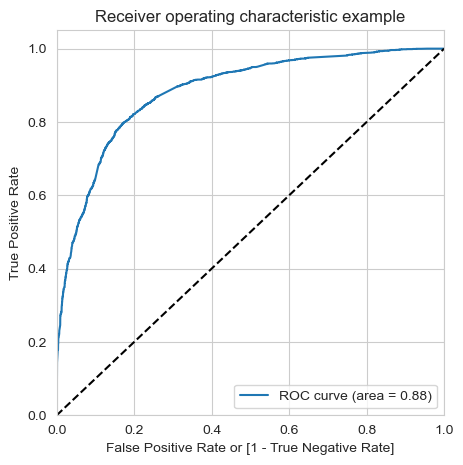

In [128]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Observation
Since the area under ROC courve is 0.88, the model is good.

## Step 10: Finding Optimal Cutoff Point

In [130]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.245073,8425,0,1,1,1,0,0,0,0,0,0,0
1,0,0.245073,8341,0,1,1,1,0,0,0,0,0,0,0
2,0,0.222198,7376,0,1,1,1,0,0,0,0,0,0,0
3,0,0.127589,7414,0,1,1,0,0,0,0,0,0,0,0
4,1,0.981455,3521,1,1,1,1,1,1,1,1,1,1,1


In [131]:
# Now let's calculate accuracy,sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378020  1.000000  0.000000
0.1   0.1  0.606348  0.969089  0.385885
0.2   0.2  0.745618  0.914787  0.642803
0.3   0.3  0.801042  0.840852  0.776847
0.4   0.4  0.819517  0.776107  0.845900
0.5   0.5  0.816043  0.701337  0.885758
0.6   0.6  0.795516  0.586884  0.922315
0.7   0.7  0.782725  0.511696  0.947449
0.8   0.8  0.758882  0.407686  0.972328
0.9   0.9  0.721301  0.282790  0.987814


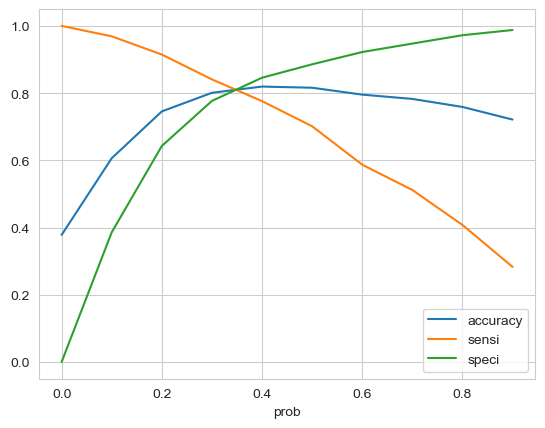

In [132]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Observation
From the curve above, 0.35 is the optimum point taking it as a cutoff probability.

In [133]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.245073,8425,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.245073,8341,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.222198,7376,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.127589,7414,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.981455,3521,1,1,1,1,1,1,1,1,1,1,1,1


#### Model Evaluation

In [134]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.812411179535765

In [135]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3217,  722],
       [ 466, 1928]], dtype=int64)

In [136]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [137]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8053467000835421

In [138]:
# Let us calculate specificity
TN / float(TN+FP)

0.8167047473978167

In [139]:
# Calculate false postive rate - predicting conversion when customer was not really converted
print(FP/ float(TN+FP))

0.1832952526021833


In [140]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7275471698113207


In [141]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8734727124626663


#### We found that the Sensitivity, Specificity and Accuracy all are above or equal to 80%. So the model seems a good one.

In [142]:
#### Assigning Lead Score to the Training data

y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.apply(lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.245073,8425,0,1,1,1,0,0,0,0,0,0,0,0,25
1,0,0.245073,8341,0,1,1,1,0,0,0,0,0,0,0,0,25
2,0,0.222198,7376,0,1,1,1,0,0,0,0,0,0,0,0,22
3,0,0.127589,7414,0,1,1,0,0,0,0,0,0,0,0,0,13
4,1,0.981455,3521,1,1,1,1,1,1,1,1,1,1,1,1,98


In [143]:
from sklearn.metrics import precision_recall_curve

In [144]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

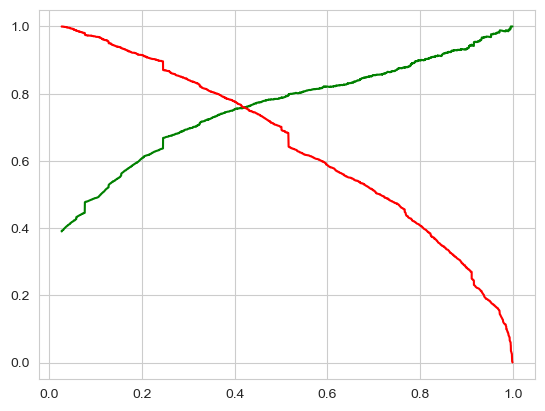

In [145]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 11: Making Prediction on test set

In [146]:
# Applying the scaler values for numerical continous columns
X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])


In [147]:
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [148]:
# Assigning the columns selected by the final model to the X-test
X_test= X_test[cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Other,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
4462,0,-0.878510,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5243,0,-0.582031,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4597,0,-0.086672,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4680,0,-0.878510,0,1,0,0,1,0,0,1,0,1,0,0,0,0
5355,0,-0.878510,0,0,0,1,0,1,0,0,0,1,0,1,0,0


In [149]:
# Adding Constant

X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res5.predict(X_test_sm)
y_test_pred[:10]

4462    0.766656
5243    0.038040
4597    0.112406
4680    0.995586
5355    0.127589
7071    0.049673
6314    0.974165
2688    0.995586
6228    0.159454
3014    0.092885
dtype: float64

In [150]:
# converting y_test_pred to a dataframe which is an array
y_pred1 =  pd.DataFrame(y_test_pred)
y_pred1.head()

,0
4462,0.766656
5243,0.038040
4597,0.112406
4680,0.995586
5355,0.127589


In [151]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [152]:
# Removing index for both dataframes to append them side by side.

y_pred1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [153]:
# Appending y_test_df and y_pred1

y_pred_final = pd.concat([y_test_df, y_pred1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4462,0.766656
1,0,5243,0.038040
2,1,4597,0.112406
3,1,4680,0.995586
4,0,5355,0.127589


In [154]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [155]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [156]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,4462,1,0.766656
1,5243,0,0.038040
2,4597,1,0.112406
3,4680,1,0.995586
4,5355,0,0.127589


In [157]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,4462,1,0.766656,1
1,5243,0,0.038040,0
2,4597,1,0.112406,0
3,4680,1,0.995586,1
4,5355,0,0.127589,0


In [158]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8136279926335175


In [159]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1385,  296],
       [ 210,  824]], dtype=int64)

In [160]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [161]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7969052224371374


In [69]:
# Let's see specificity
print("Specificity :",TN / float(TN+FP))

NameError: name 'TN' is not defined

In [163]:
# Assigning the lead score to testing data

y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,4462,1,0.766656,1,77
1,5243,0,0.038040,0,4
2,4597,1,0.112406,0,11
3,4680,1,0.995586,1,100
4,5355,0,0.127589,0,13


#### Observations
After running the model on the test data,

. Accuracy : 81.36%
. Senstivity : 79.69%
. Specificity : 82.39%

### Conclusion

#### Train data:
##### . Accuracy : 81.24%

##### . Senstivity : 80.53%

##### . Specificity : 81.67%
    
#### Test data:
##### . Accuracy : 81.36%

##### . Senstivity : 79.69%

##### . Specificity : 82.39%

We have achieved our goal of getting the target lead conversion rate to be around 80%. The model seems to read the conversion rate very efficiently.

In [164]:
# The potential leads to be treated as Hotlead. where lead score is more than 85%.

In [165]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
3,4680,1,0.995586,1,100
6,6314,0,0.974165,1,97
7,2688,1,0.995586,1,100
17,4050,1,0.971110,1,97
20,4382,1,0.882028,1,88
...,...,...,...,...,...
2687,5206,1,0.876990,1,88
2696,2493,1,0.915870,1,92
2698,8056,1,0.997856,1,100
2702,2907,1,0.910690,1,91


There are total around 397 customer with more than 85% lead score can be considered to be hot leads.

In [166]:
# for each individual level customer that need to contacted.

hot_leads_id = hot_leads['Prospect ID'].values
hot_leads_id

array([4680, 6314, 2688, 4050, 4382, 2631, 2680, 8257, 4913, 1595, 5741,
       3022, 5757, 4786, 1617, 1305,  892, 2011, 5577, 2411, 4613,  739,
       9076, 8265, 6423, 7193, 2926, 1682, 2584, 8375, 4775, 2022, 2617,
        454, 1563, 3078,  447, 5561, 2486, 2657, 4773, 5159, 3817,  560,
       3060, 8576, 2014, 3532, 4869, 7412, 3549, 5453, 4941, 1594, 5799,
       4028, 6046, 7682, 4992, 8591,  356, 6651, 6315, 2681, 7396, 8620,
       3917, 6792, 9031, 1290, 3484, 4844, 6125, 8243, 6175, 4213, 4732,
       2578, 5805, 4826, 2410, 4789,  374, 4693, 7817,  405,  953, 4543,
       3535, 8161, 6931, 7219, 8571, 2163, 5975,  112, 8180, 3496, 5503,
        964, 7222, 2675, 2161, 4707,  997, 2623, 4123, 5364, 8977, 7521,
       7448, 5824, 8343, 7406, 5337, 2122, 2196, 4772,  264, 4218, 8570,
       6152, 4934, 1559, 2128, 4940, 5877, 3290, 2547, 7927, 7570, 4005,
       5808, 7469, 6519, 2010, 1254, 1527, 3601, 7039, 4360, 4548, 5390,
       1588, 4799, 8393, 6994, 9228, 5783, 6480, 61

In [167]:
# Important feature that need to be consider for final model

res5.params.sort_values(ascending= False)

Lead Origin_Lead Add Form                               3.385114
Last Activity_Had a Phone Conversation                  3.143810
Lead Source_Welingak Website                            3.031113
What is your current occupation_Working Professional    2.628054
Last Notable Activity_Unreachable                       2.129083
Last Activity_SMS Sent                                  1.759778
Total Time Spent on Website                             1.094253
Lead Origin_Lead Import                                 1.086303
Lead Source_Olark Chat                                  1.059703
Last Activity_Email Opened                              0.572615
const                                                  -0.668644
Last Notable Activity_Modified                         -0.797376
Specialization_Hospitality Management                  -0.819175
Lead Origin_Landing Page Submission                    -1.078152
Last Notable Activity_Olark Chat Conversation          -1.090149
Do Not Email             

### Recommendation

1. Company should actively pursue the leads who lead origin is "Lead Add Form.
2. Company should have a phone conversation with potential customer.
3. Company should make contact to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.
4. Company should make contact to the leads who are the "working professionals" as they are more likely to get converted.
5. Company should make contact to the leads whose last activity was SMS Sent as they are more likely to get converted. 
6. Company should make contact to the leads who spent "more time on the websites" as these are more likely to get converted.
7. The company should not make contact to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.
8. Company should not make contact to the leads whose Specialization was "Others" as they are not likely to get converted.
9. Company should not make contact to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.
10. Company should not make contact to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.